## Импорт библиотек и считывание данных

In [103]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [104]:
df=pd.read_csv('hotel_data.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Проверка на пропуски

In [105]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [106]:
df['children'].fillna(0,inplace=True)

In [107]:
df['country'].fillna('Unknown', inplace=True)

In [108]:
df['agent'].fillna(-1,inplace=True)

## Проверка на дупликаты

In [109]:
df.duplicated().sum()

31994

In [110]:
df.drop_duplicates(inplace=True)

## Нормализация стоимости ночи пребывания

In [111]:
min_max_scaler=MinMaxScaler()
min_max_scaler.fit(df['adr'].values.reshape(-1,1))
df['adr_normalised']=min_max_scaler.transform(df['adr'].values.reshape(-1,1))

## Объединение столбцов с данными о дате в один

In [112]:
df["arrival_date_month_num"] = df.apply(lambda row: datetime.datetime.strptime(row['arrival_date_month'],'%B').month, axis=1)

In [113]:
df["date"] = df.apply(lambda row: datetime.date(year=row['arrival_date_year'],day=row['arrival_date_day_of_month'],month=row['arrival_date_month_num']), axis=1)

In [114]:
del df["arrival_date_year"]
del df['arrival_date_month']
del df['arrival_date_week_number']
del df['arrival_date_day_of_month']
del df['arrival_date_month_num']

## Дескриптивный анализ

In [115]:
df.corr(numeric_only=True)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_normalised
is_canceled,1.000000,0.184806,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.000482,0.009040,0.004464,0.127986,-0.184206,-0.120545,0.127986
lead_time,0.184806,1.000000,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.081004,0.143630,0.132152,0.023564,-0.086541,0.034240,0.023564
stays_in_weekend_nights,0.060191,0.235145,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.158728,0.050211,-0.031680,0.038972,-0.042920,0.032396,0.038972
stays_in_week_nights,0.082928,0.310129,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.190337,0.147486,0.001905,0.053298,-0.044303,0.037823,0.053298
adults,0.081816,0.140493,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,0.030199,0.216502,-0.015740,0.248999,0.007802,0.112772,0.248999
children,0.067369,0.028650,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,0.042168,0.038657,-0.020419,0.326293,0.036332,0.044596,0.326293
babies,-0.020543,-0.003614,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.028899,0.024804,-0.006840,0.023446,0.030885,0.094820,0.023446
is_repeated_guest,-0.089643,-0.147003,-0.106948,-0.113543,-0.171714,-0.045651,-0.012977,1.000000,0.206374,0.441456,0.006047,-0.065988,-0.259811,-0.012816,-0.153040,0.072019,-0.001321,-0.153040
previous_cancellations,0.051468,0.005375,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,0.206374,1.000000,0.392064,-0.010269,-0.033102,-0.190707,0.003682,-0.050267,-0.003399,0.001871,-0.050267
previous_bookings_not_canceled,-0.052154,-0.078931,-0.056653,-0.058503,-0.120914,-0.029423,-0.009193,0.441456,0.392064,1.000000,0.005420,-0.058659,-0.224053,-0.006304,-0.085721,0.040872,0.027112,-0.085721


In [116]:
df[['lead_time','stays_in_weekend_nights','stays_in_week_nights']].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights
count,87396.000000,87396.000000,87396.000000
mean,79.891368,1.005263,2.625395
std,86.052325,1.031921,2.053584
min,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000
50%,49.000000,1.000000,2.000000
75%,125.000000,2.000000,4.000000
max,737.000000,19.000000,50.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time', ylabel='Count'>

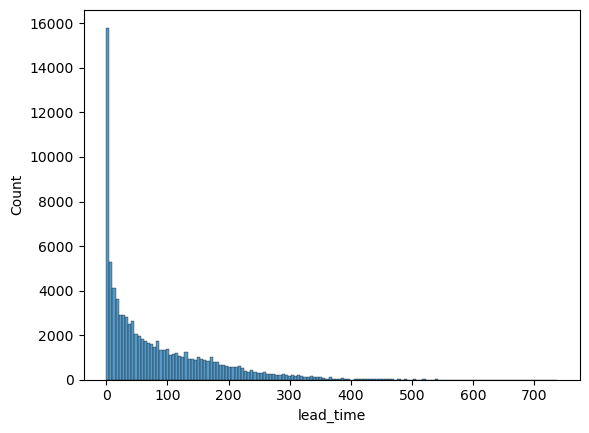

In [117]:
sns.histplot(df.lead_time)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stays_in_weekend_nights', ylabel='Count'>

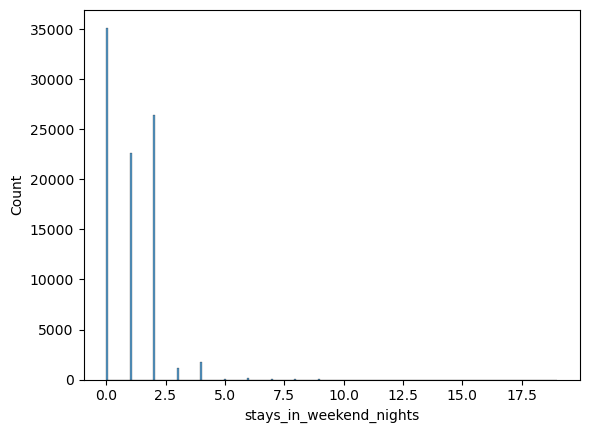

In [118]:
sns.histplot(df.stays_in_weekend_nights)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stays_in_week_nights', ylabel='Count'>

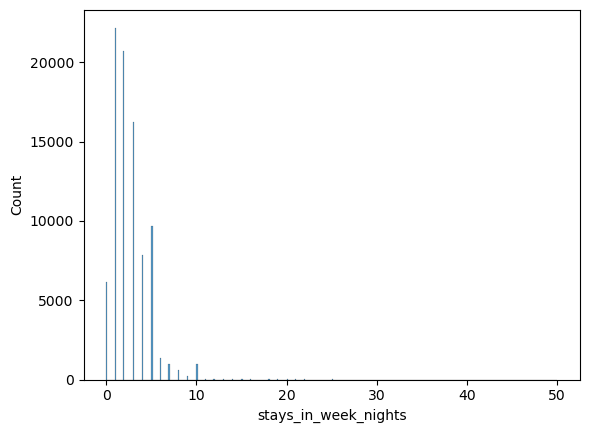

In [119]:
sns.histplot(df.stays_in_week_nights)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


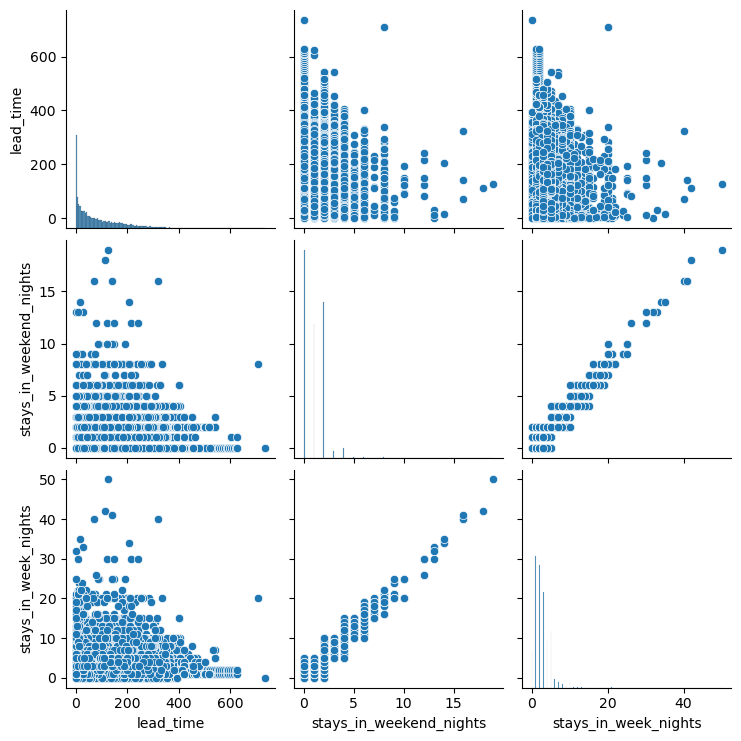

In [120]:
sns.pairplot(df[['lead_time','stays_in_weekend_nights','stays_in_week_nights']])

<Axes: >

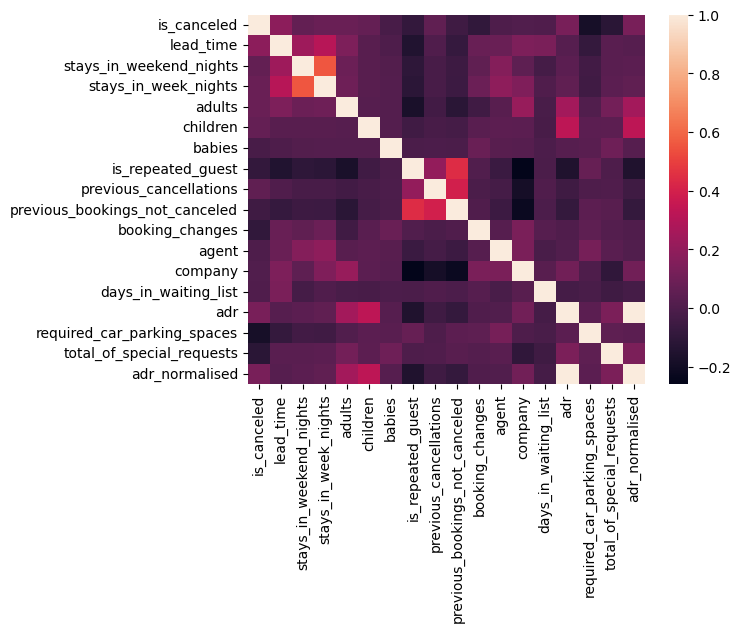

In [121]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='lead_time'>

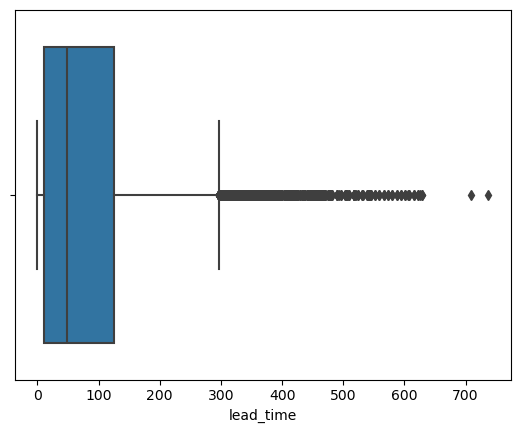

In [122]:
sns.boxplot(x=df['lead_time'])

## Построение логистической регрессии для прогнозирования отмены бронирования

In [123]:
log_reg=LogisticRegression()

In [124]:
X=df[['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children']]
Y=df[['is_canceled']]

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [126]:
log_reg.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [127]:
Y_predicted=log_reg.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_predicted))

Accuracy: 0.72
